<a href="https://colab.research.google.com/github/marialejandrapulido1/analitica-negocios/blob/main/Reto_6_MAPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maria Alejandra Pulido**

*Reto 6 - Redes neuronales*

**Cargar librerias a trabajar**

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**Conectar con drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Cargar la base de datos**

In [ ]:
#cargar archivo
nxl = '/content/drive/MyDrive/ANALITICA/6. SolicitantesCrédito(USD).xlsx'
XDB = pd.read_excel(nxl, sheet_name= 1)
XDB.head(4)

#datos que necesito (Edad, Hijos, Personas a Cargo, Estrato, Ingresos, Egresos, Monto, Plazo, Cuota)
XDB = XDB[['Edad', 'Hijos', 'Perscargo', 'Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)', 'Score']]

#variables de entrada
XD = np.array(XDB[['Edad', 'Hijos', 'Perscargo', 'Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)']])

#variable de salida
yd = np.array(XDB[['Score']])

#normalizacion de las variables
#divide cada columna por maximo
XDn = XD/np.max(XD, axis = 0)
XDn
#divide por maximo
ydn = yd/np.max(yd)
ydn

array([[0.47728684],
       [0.39318383],
       [0.34222753],
       ...,
       [0.38103332],
       [0.34680326],
       [0.48563814]])

**Adaline / diseñar la neurona artificial**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0127
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0111
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0089
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0075
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0053
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0046
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039
Epoch 9/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0034
Epoch 10/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029
Epoch 11/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027
Epoch 12/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024
Epoch 13/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022
Epoch 14/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020
Epoch 15/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

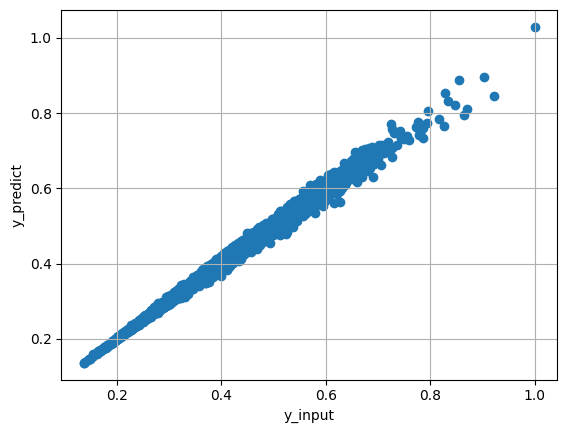

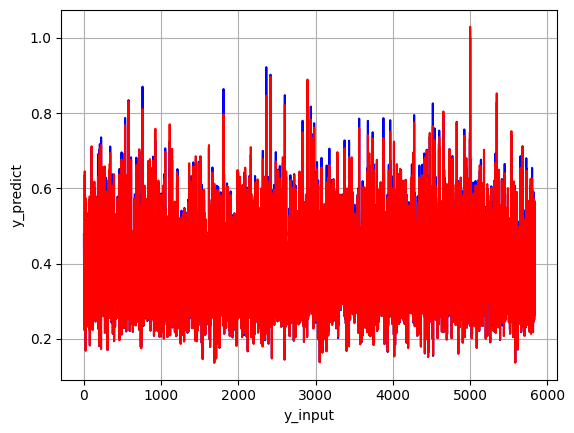

correlacion de los datos:            0         1
0  1.000000  0.996784
1  0.996784  1.000000
conexiones:  [array([[ 0.1643607 ],
       [ 0.03415491],
       [ 0.02631403],
       [ 0.16394101],
       [ 0.45937043],
       [-0.09109372],
       [ 0.08094972],
       [ 0.15694226],
       [ 0.31828362]], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
El score estimado es: [[733.62625759]]


In [ ]:
#incorporar al modelo 10 regresiones lineales
adaline = tf.keras.models.Sequential([tf.keras.layers.Dense(1, activation = 'relu', input_shape=(9,), use_bias = False)])
adaline.load_weights('/content/drive/MyDrive/ANALITICA/pesos_adaline_L.weights.h5')
adaline.compile(optimizer = 'sgd', loss = 'mse')

#recorrer 100 veces la tabla
history= adaline.fit(XDn, ydn, epochs = 100)
#prediccion
ydp = adaline.predict(XDn)

#mostrar graficas
plt.figure()
plt.scatter(ydn,ydp)
plt.grid()
plt.xlabel('y_input')
plt.ylabel('y_predict')
plt.show()

plt.figure()
plt.plot(ydn, color='blue')
plt.plot(ydp, color='red')
plt.grid()

plt.xlabel('y_input')
plt.ylabel('y_predict')
plt.show()

#determinar correlacion
df=pd.DataFrame(np.column_stack((ydn,ydp)))
print("correlacion de los datos: ", df.corr())

#conexiones nerviosas
w=adaline.get_weights()
print("conexiones: ", w)

#evaluar un solicitante de credito:
Xsc= [45, 1, 0, 4, 2000, 1000, 1200, 24, 60],
Xscn=Xsc/np.max(XD, axis=0)
ydpsc=adaline.predict(Xscn)
print('score estimado: ', ydpsc*np.max(yd, axis=0) )


**Madaline / diseño modelo multiadaptive linear**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 9/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 10/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
Epoch 11/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 12/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014
Epoch 13/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
Epoch 14/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 15/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

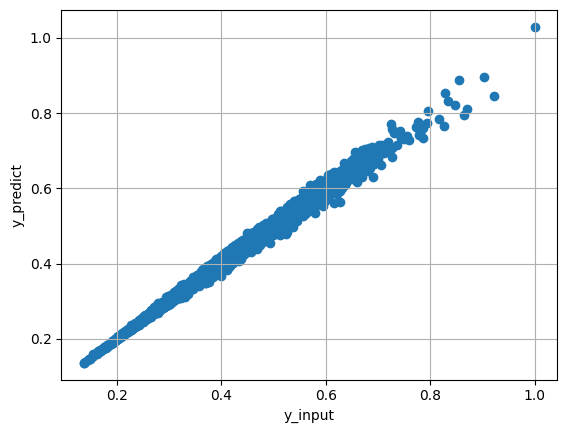

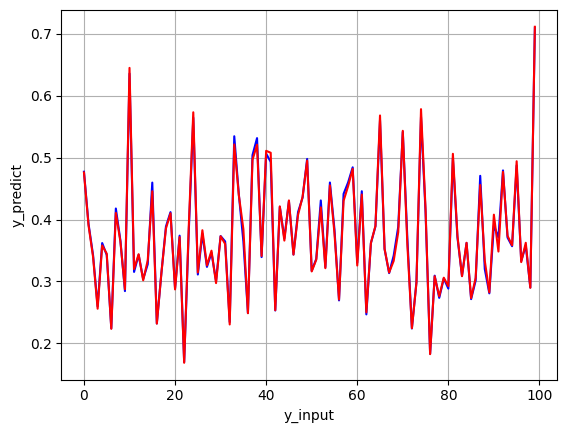

correlacion de los datos:            0         1
0  1.000000  0.996784
1  0.996784  1.000000


,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,0.20186,0.299251,-0.17084,0.297897,0.100591,0.300209,0.280485,0.291135,-0.202729


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
score estimado:  [[634.97127409]]


In [75]:
madaline=tf.keras.models.Sequential([tf.keras.layers.Dense(10, input_shape=(9,), activation='relu',use_bias=False), tf.keras.layers.Dense(1, activation='relu', use_bias=False)])
madaline.load_weights("/content/drive/MyDrive/ANALITICA/pesos_madaline_L.weights.h5")
madaline.compile(optimizer='sgd', loss='mse')

#recorrer la tabla 100 veces
history=madaline.fit(XDn,ydn, epochs=100)
#prediccion
ydpm=madaline.predict(XDn)

plt.figure()
plt.scatter(ydn,ydp)
plt.grid()
plt.xlabel('y_input')
plt.ylabel('y_predict')
plt.show()

plt.figure()
plt.plot(ydn [0:100], color='blue')
plt.plot(ydp[0:100], color='red')
plt.grid()

plt.xlabel('y_input')
plt.ylabel('y_predict')
plt.show()

#Determinar la correlacion
df=pd.DataFrame(np.column_stack((ydn,ydp)))
print("correlacion de los datos: ", df.corr())

#conexiones nerviosas
WC=madaline.get_weights()
W= WC[0]; c=WC[1]
#capa 0 - 4 a 10
#capa 1 - 10 -1
#salida: conexiones nerviosas (1 regresion)

a=W@c
df2=pd.DataFrame(a.T)
df2.columns=['Edad', 'Hijos', 'Perscargo', 'Estrato','Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)']
display (df2)

#evaluar un nuevo solicitante de credito
Xsc= [45, 1, 0, 4, 2000, 1000, 1200, 24, 60],
Xscn=Xsc/np.max(XD, axis=0)
ydpsc=madaline.predict(Xscn)
print('score estimado: ', ydpsc*np.max(yd, axis=0))

# **Analisis de resultados**

De acuerdo con el análisis realizado a los modelos de redes neuronales Adaline y Madaline entrenados con la base de datos de solicitantes de crédito, se puede destacar que la correlación entre las predicciones del modelo y los valores reales del score fue baja en ambos casos. Esto se evidencia tanto en la dispersión de puntos como en la diferencia entre las curvas de salida esperada. Además, se observó que variables como los egresos no están siendo penalizadas correctamente, esto permite la aprobación de solicitantes con una alta carga financiera.

Esto indica que el desempeño general del modelo es deficiente y que las decisiones que toma podrían no ser confiables, especialmente al aceptarle crédito a personas con altos egresos. Para este análisis, es importante revisar la estructura de pesos del modelo y considerar un ajuste que valore de manera más adecuada los factores de riesgo financiero. También se puede  evaluar modelos similares para capturar tener más precisión.